# url: https://www.youtube.com/watch?v=uBkQ7dhSByc

## バスケット分析（アソシエーション分析）とは？

ある事象と"同時に発生する事象"が何かを分析する手法。

ex.)消費者が「ある商品」を購入した際に、よく一緒に買われている商品は何か？


## よく使用される指標

### ・Confidence（信頼度）
「リンゴを買った人のうち、どれくらいの人がミカンも買ったか」という確率

### ・Support（支持度）
「そもそもリンゴとミカンを一緒に買った人がどのくらいいるのか」という指標

### ・Lift（リフト）
「そもそもミカン自体がどれだけ売れているのか」という指標

## Aprioriアルゴリズム
実際は1対1だけでなく、「リンゴとミカンを買った人がモモをどれだけ買うか」、のような多対多の関係性もある。

・・・が、商品数が多くなってくるとそこまですべて計算するのはほぼ無理なので、この計算を高速で行うためのアルゴリズム。


# ※ 詳細説明
信頼度(X->Y)はP(Y|X)でも正しい

---

## 例1:
X: 商品 X

Y: 商品 Y

N(X): 商品 X を含むデータ数

N(Y): 商品 Y を含むデータ数

N(X, Y): 商品 X と商品 Y の同時出現回数

N(U): 全体のデータ数

### 一般的な考え方
Support(支持度): サポート(X) = N(X) / N(U)

Confidence（信頼度）: 信頼度(X->Y) = N(X, Y) / N(X)

Lift（リフト）: リフト(X -> Y) = (信頼度(X->Y)) / (N(Y) / N(U))

### 確率論的な考え方(厳密にはアソシエーション分析は頻度であり確率ではないため、考え方は間違ってはいないが、一般的な考え方のほうが一般的には正解。)

Support(支持度): サポート(X) = P(X)

Confidence（信頼度）: 信頼度(X->Y) = P(Y|X)

Lift（リフト）: リフト(X -> Y) = confidence / P(Y) -> xの出現によってyの確率に変動が起きるという意味

---

## 例2:
例を考える前提として、ある店舗の購買データを考えます。以下のようなデータがあるとします。

全体のデータ数: 1000

商品 A を含むデータ数: 600

商品 B を含むデータ数: 400

商品 A と商品 B の同時出現回数: 300

これらのデータを使用して、各指標を計算します。

### Support（支持度）:
商品 A の支持度: サポート(A) = 600 / 1000 = 0.6

商品 B の支持度: サポート(B) = 400 / 1000 = 0.4

### Confidence（信頼度）:

商品 A と商品 B の信頼度(Aの観点): 信頼度(A -> B) = 300 / 600 = 0.5

### Lift（リフト）:

商品 A と商品 B のリフト: リフト(A -> B) = (0.5) / (0.4) = 1.25

この例では、商品 A と商品 B の同時購買回数が300で、商品 A を購買するデータ数が600です。したがって、各指標の計算は上記の通りです。リフト値が1.25となっており、1よりも大きいため、商品 A と商品 B は関連性があると言えます。

---

①支持度

全データから商品AとBが同時に購入されたデータの割合。

割合が高いほどビジネスインパクトが大きい。

支持度＝商品AとBが同時購入されたデータ数／全データ数

②確信度

商品Aを購入した人がBも購入したケース割合

割合が高いほど2商品の関連性が強い

確信度＝商品AとBが同時購入されたデータ数／商品Aが購入されたデータ数

③リフト値

①②の関連性の高さを裏付けるための値

目安は1以上

リフト値＝②の確信度／Bが購入されたデータ数

In [ ]:
#データの読み込み＆整形
import pandas as pd

df_sales = pd.read_csv("/content/data_for_association_analysis.csv",index_col="名前")
df_sales = df_sales.fillna(False).replace("○",True)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

#aprioriでまずsupportが高い単品or組み合わせを選出
freq_items = apriori(df_sales, min_support=0.1, use_colnames=True)

#上で選ばれた組み合わせの中でliftが高い組み合わせを選出
freq_items_top = association_rules(freq_items, metric = "lift",min_threshold = 1.5)

freq_items_top

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(バナナ),(みかん),0.307692,0.384615,0.192308,0.625000,1.625000,0.073964,1.641026
1,(みかん),(バナナ),0.384615,0.307692,0.192308,0.500000,1.625000,0.073964,1.384615
2,(バナナ),(すいか),0.307692,0.307692,0.153846,0.500000,1.625000,0.059172,1.384615
3,(すいか),(バナナ),0.307692,0.307692,0.153846,0.500000,1.625000,0.059172,1.384615
4,"(もも, りんご)",(みかん),0.192308,0.384615,0.115385,0.600000,1.560000,0.041420,1.538462
5,"(りんご, みかん)",(もも),0.192308,0.346154,0.115385,0.600000,1.733333,0.048817,1.634615
6,(もも),"(りんご, みかん)",0.346154,0.192308,0.115385,0.333333,1.733333,0.048817,1.211538
7,(みかん),"(もも, りんご)",0.384615,0.192308,0.115385,0.300000,1.560000,0.041420,1.153846
8,"(バナナ, りんご)",(みかん),0.153846,0.384615,0.115385,0.750000,1.950000,0.056213,2.461538
9,"(りんご, みかん)",(バナナ),0.192308,0.307692,0.115385,0.600000,1.950000,0.056213,1.730769


# aprioriアルゴリズムの以下の指標は以下の認識で正しい

antecedents

consequents

antecedent support: P(antecedents)

consequent support: P(consequents)

support: P(antecedents,consequents)

confidence: P(consequents|antecedents)

lift:　confidence / consequent support

leverage: 事象Aと事象Bの観測頻度と、事象Aと事象Bが独立している場合に予想される頻度の差
leverage=0は完全な独立性を示す

conviction: convictionが高い場合、事象Bが事象Aとの相互性が高いことを指す。

---

##質問: つまり理解としては間違ってはいないって認識でいいの?

回答: はい、ご提供いただいた認識は正しい方向に向かっています。Apriori アルゴリズムにおけるアソシエーションルールの評価指標を説明するために使用されている用語と概念は、大部分で合っています。ただし、最も正確な説明をするために、以下のような微調整が必要です。

antecedent support（前件支持度）と consequent support（後件支持度）は、それぞれ前件（antecedents）と後件（consequents）の出現確率を表すものであることを強調しておきましょう。

confidence（信頼度）の計算式を P(consequents|antecedents) = support / antecedent support と正しく表現しました。

lift（リフト）は confidence / consequent support という形で表現されるのは正しいですが、lift が 1 より大きい場合にアソシエーションが強いことを示す、という点も補足しておきます。

提供いただいた説明は、Apriori アルゴリズムの基本的な評価指標を捉えており、間違ってはいないと言えます。アソシエーション分析を理解し、アルゴリズムを適用する上での参考になるでしょう。

In [ ]:
#図にして表示
import networkx as nx
import matplotlib.pyplot as plt

# 親ノードの抽出
ant = freq_items_top['antecedents'].values
ant = [tuple(x) for x in ant]

# 子ノードの抽出
con = freq_items_top['consequents'].values
con = [tuple(x) for x in con]

# 全ノードのリストアップ
both = list(set(ant + con))

both

[('バナナ', 'もも'),
 ('バナナ',),
 ('もも', 'りんご'),
 ('バナナ', 'りんご'),
 ('バナナ', 'みかん'),
 ('もも', 'みかん'),
 ('すいか',),
 ('りんご', 'すいか'),
 ('みかん',),
 ('りんご', 'みかん'),
 ('もも',),
 ('なし', 'りんご'),
 ('なし',)]

In [ ]:
# 関係グラフの初期化
G = nx.DiGraph()

# ノードの追加
for n in both:
    G.add_node(n)

# エッジの追加
for i in range(len(freq_items_top)):
    item = freq_items_top.loc[i]
    ant = tuple(item['antecedents'])
    con = tuple(item['consequents'])
    G.add_edge(ant, con)

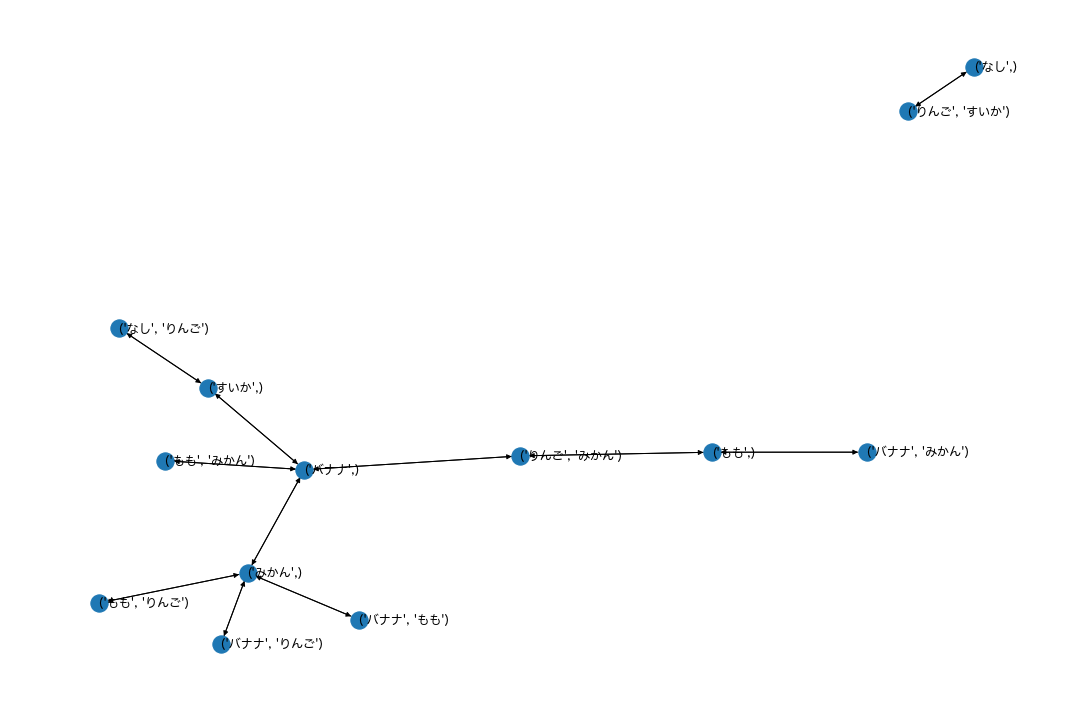

In [ ]:
#グラフの描画
pos = nx.spring_layout(G,seed=1)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos,
    horizontalalignment='left',
    verticalalignment='center',font_family='Hiragino Maru Gothic Pro')
plt.axis('off')
plt.tight_layout()
plt.show()